**<h1 > Weather</h1>**

***

**<h2 >Knock airport Weather</h2>**

<div><img src="https://img.rasset.ie/0013f339-800.jpg" alt="Knock Airport", width=640, height=360"></div>


###  Description of Assignment

***

Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv


**Tasks**

Plot:

1. The temperature
1. The mean temperature each day
1. The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

1. The Windspeed (there is data missing from this column)
1. The rolling windspeed (say over 24 hours)
1. The max windspeed for each day
1. The monthly mean of the daily max windspeeds 



### Import the Libraries

***

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other features. 
Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large 
multi-dimensional arrays and matrices. It also supplies a large collection of high-level mathematical functions to operate on these arrays. 
[NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in 
conjunction with its numerical mathematics extension NumPy.

We use [Seaborn](https://seaborn.pydata.org/) which is a library for making statistical graphics in Python. It builds on top of matplotlib and 
integrates closely with pandas 

We use [datetime](https://docs.python.org/3/library/datetime.html) which is a built-in module the provides classes that can be used to manipulate dates and times and make them easy to work with.


In [1]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import seaborn as sns
import datetime as dt


### Load the dataset

***

 The first 23 rows of the dataset contained metadata, it was important to skip these rows when importing the dataset. The `skiprows=23` argument was passed to the `pd.read_csv()` function to achieve this goal. I also used the metadata in the first 23 rows to rename the columns of the dataset. This makes the datset clearer and easier to read. Initiall, I was using the `low_memory=False` argument to ensure that the data was read in as a single data type, but unfortunately this was not distinguishing between the `white space` characters contained within the dataset, and therfore this approach was abandoned. I choose to use the `skipinitialspace=True` argument instead, and the reasoning for this is explained below, when we are looking at the missing values in the dataset.

In [2]:
#Import the dataset

df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23, skipinitialspace=True) 
#skiprows=23 is used to skip the first 23 rows of the dataset as they are just used for metadata
#low_memory=False is used to ensure that the data is read in as a single data type

#We need to rename the columns of the dataset as they are not properly named - use the metadata to do this
df.columns = ['Date/Time (utc)', 'Indicator', 'Precipitation Amount (mm)', 'Indicator', 'Temperature (°C)', 'Indicator', 'Wet Bulb Temperature (°C)', 'Dew Point Temp (°C)', 'Vapour Pressure (hPa)','Relative Humidity (%)', 'Mean Sea Level Pressure (hPa)','Indicator', 'Mean Wind Speed (knot)', 'Indicator', 'Predominant Wind Direction (deg)', 'Present Weather', 'Past Weather', 'Sunshine duration (hours)', 'Visibility', 'Cloud Height (ft * 100s)', 'Cloud amount']
df.head()


,Date/Time (utc),Indicator,Precipitation Amount (mm),Indicator,Temperature (°C),Indicator,Wet Bulb Temperature (°C),Dew Point Temp (°C),Vapour Pressure (hPa),Relative Humidity (%),...,Indicator,Mean Wind Speed (knot),Indicator,Predominant Wind Direction (deg),Present Weather,Past Weather,Sunshine duration (hours),Visibility,Cloud Height (ft * 100s),Cloud amount
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0.0,0,0.0,25.0,81.0,0.0,35000.0,32.0,5.0
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,40000.0,45.0,5.0
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0.0,0,0.0,80.0,81.0,0.0,8000.0,32.0,7.0
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,28000.0,35.0,6.0
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0.0,0,0.0,2.0,11.0,0.0,40000.0,40.0,6.0


### Data Exploration
***

Looking at the data above we can see that there was a gap in the data recorded on the dataset. The first row gives the weather information for the 2nd April 1996 at 2pm. The next row jumps to 31st July 1996 at 08:00am. If we want to represent the mean temperatures correctly, its probably a good idea to drop the first row of the the dataset, as this will skew our analysis based on the data missing in between these two dates. Lets do this before continuing on with our analysis.

In [3]:
#Drop the first row of the dataset as there is no data from 1st April 1996 to 31st July 1996
df.drop(0, inplace=True)
#Reset the index of the dataset after dropping the first row
df.reset_index(drop=True, inplace=True)
#Confirm our changes
df.head()

,Date/Time (utc),Indicator,Precipitation Amount (mm),Indicator,Temperature (°C),Indicator,Wet Bulb Temperature (°C),Dew Point Temp (°C),Vapour Pressure (hPa),Relative Humidity (%),...,Indicator,Mean Wind Speed (knot),Indicator,Predominant Wind Direction (deg),Present Weather,Past Weather,Sunshine duration (hours),Visibility,Cloud Height (ft * 100s),Cloud amount
0,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,40000.0,45.0,5.0
1,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0.0,0,0.0,80.0,81.0,0.0,8000.0,32.0,7.0
2,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,28000.0,35.0,6.0
3,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0.0,0,0.0,2.0,11.0,0.0,40000.0,40.0,6.0
4,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0.0,0,0.0,1.0,82.0,0.0,40000.0,43.0,6.0


 Check the datafram dimensionally with the `df.info` funtion.

In [4]:
#Explore the dataset further, looking at the data types of each column, the number of non-null values and the memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247673 entries, 0 to 247672
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date/Time (utc)                   247673 non-null  object 
 1   Indicator                         247673 non-null  int64  
 2   Precipitation Amount (mm)         247624 non-null  float64
 3   Indicator                         247673 non-null  int64  
 4   Temperature (°C)                  247673 non-null  float64
 5   Indicator                         247673 non-null  int64  
 6   Wet Bulb Temperature (°C)         247673 non-null  float64
 7   Dew Point Temp (°C)               247673 non-null  float64
 8   Vapour Pressure (hPa)             247673 non-null  float64
 9   Relative Humidity (%)             247673 non-null  int64  
 10  Mean Sea Level Pressure (hPa)     247655 non-null  float64
 11  Indicator                         247673 non-null  i

### Dealing with missing values

***

After initally loading the dataset, when we first ran the `isna().sum()` functions, they indicated that the dataset contained no missing values. However, under inspection we could see that this was not true and that the dataset does in fact contain missing values. The cells were found to contain whitespace, which is why they did not register. However, the `read_csv()` function contains `skipinitialspace` argument. This is used to skip spaces after a delimeter.

![skipspaces](../Images/skipinitialspace.png)

Therefore, using the `skipinitialspace=True` argument removed the whitespaces that had being masking the hidden values in our dataset. We then got a true picture of the number of missing values in each column of the dataset as shown in the code cell below.

While using the `skipinitialspace=True` argument proved to be simple and effective, its not the only way we could have tackled this problem. We could have went down the route of using python regular expressions in the `df.replace()` function. The regular expression given below would have also converted the whitespace characters in the dataset to NAN values.

```python
df.replace(r",\s", np.nan, regex=True, inplace=True)
```

Another method that could have being used is the find and replace in Visual Studio Code. Again, we would be using a regular expression to achieve this goal. A snapshot of the code we could have used in visual studion code to achieve this is shown below.

![cleaning](../Images/cleaning.png)

Finally, it should be noted that the `read_csv()` function also contains an argument called `na_values` which allows the user to list strings to be recognised as NAN values. Therefore, for this dataset if we set the `na_values = ' '`, our whitespce characters would be recognised as NAN values when we load in the dataset. More information on this can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

![na_values](../Images/pandasna_values.png)

In [5]:
#Check for missing values. We can see that there is a lot of missing data in the dataset
df.isna().sum()

Date/Time (utc)                         0
Indicator                               0
Precipitation Amount (mm)              49
Indicator                               0
Temperature (°C)                        0
Indicator                               0
Wet Bulb Temperature (°C)               0
Dew Point Temp (°C)                     0
Vapour Pressure (hPa)                   0
Relative Humidity (%)                   0
Mean Sea Level Pressure (hPa)          18
Indicator                               0
Mean Wind Speed (knot)                 50
Indicator                               0
Predominant Wind Direction (deg)       52
Present Weather                     55079
Past Weather                        55080
Sunshine duration (hours)               0
Visibility                          62174
Cloud Height (ft * 100s)               18
Cloud amount                           18
dtype: int64

### Convert 'Date/Time (utc)' column to datetime object

***

Before we convert the `Date/Time (utc)` column to a datetime object, the format of the strings needed to be noted (eg 31-jul-1996 08:00). In order to correctly convert this column to a datetime object we need to pass the `format='%d-%b-%Y %H:%M'` argument to the `pd.to_datetime()` function. After this was completed we could then perform time series analysis on the data in the dataset.

In [6]:
#Convert the Date/Time column to a datetime object.
#This will convert the date time from the current format to a datetime object which will allow us to perform time series analysis on the data
#The format parameter is used to specify the format of the date time in the dataset

df['Date/Time (utc)'] = pd.to_datetime(df['Date/Time (utc)'], format='%d-%b-%Y %H:%M')
print(df['Date/Time (utc)'])

0        1996-07-31 08:00:00
1        1996-07-31 09:00:00
2        1996-07-31 10:00:00
3        1996-07-31 11:00:00
4        1996-07-31 12:00:00
                 ...        
247668   2024-10-31 20:00:00
247669   2024-10-31 21:00:00
247670   2024-10-31 22:00:00
247671   2024-10-31 23:00:00
247672   2024-11-01 00:00:00
Name: Date/Time (utc), Length: 247673, dtype: datetime64[ns]


### Plot the Temperature

***

We have now got the dataset into a position where we can plot the temperature over time. We can see that the `Temperature (°C)` column contains zero missing values and we have converted the `Date/Time (utc)` column to a datetime object. We will also extract the date, without the time from this column below, to help make a better plot.

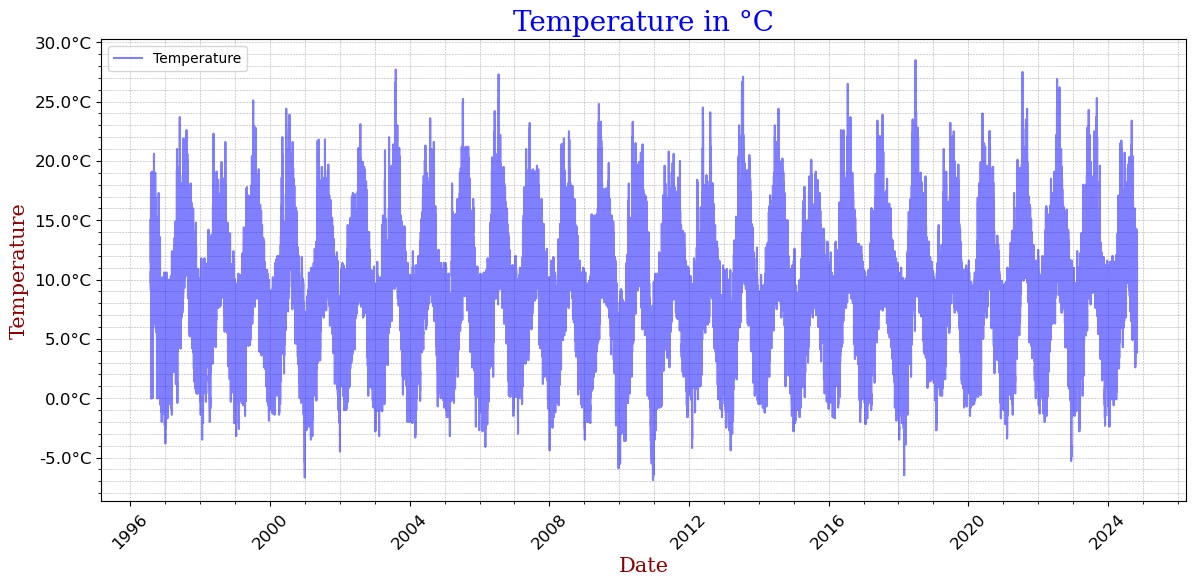

In [7]:
# Extract only the date (without time) for plotting
df['Date_only'] = df['Date/Time (utc)'].dt.date

date = df['Date_only'].to_list()

# Create a function to format the temperature values on the y-axis
def temperature_formatter(date, pos):
    s = f"{date}\N{DEGREE SIGN}C"
    return s

#Plot the temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the date vs the temperature
ax.plot(df['Date_only'], df['Temperature (°C)'], color='blue', alpha=0.5)
#Set the title
ax.set_title('Temperature in °C', fontdict = font1)
#Set the x and y lables
ax.set_xlabel('Date' , fontdict = font2)
ax.set_ylabel('Temperature', fontdict = font2)

ax.yaxis.set_major_formatter(temperature_formatter)

#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)


#Add ticks to the plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)


#Add a legend
plt.legend(['Temperature'], loc='upper left')
ax.minorticks_on()

Obviously, with such a large amount of date being plotted, a good visualisation is not achieved. We have to remember that we are looking at temperatures from 1996 to the present. We can truncate the data based on time to achieve much clearer and cleaner plots. We can alos set the `Date/Time (utc)` column as the index, which will mean that we can use the datetime as a filter rather than selecting row numbers. Lets have a look at this below.

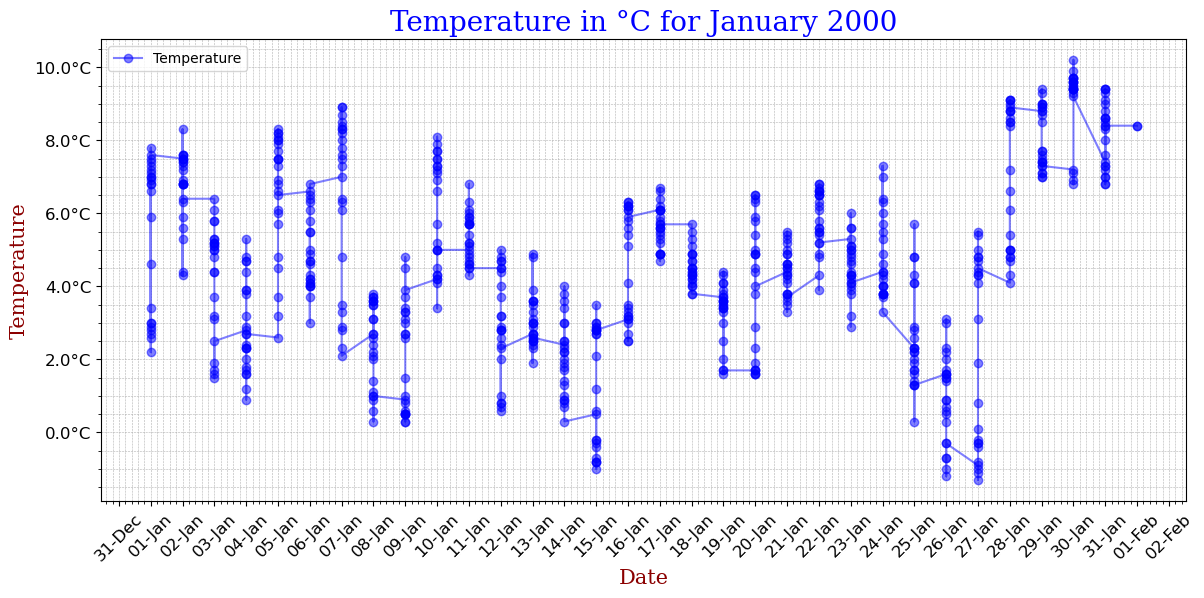

In [ ]:
#Set the Date/Time column as the index of the dataframe. This will allow us to perform time series analysis on the data
df.set_index('Date/Time (utc)', inplace=True)

#Set the start and finish date
dateFrom = "2000-01-01 01:00:00"
dateTo = "2000-02-01 01:00:00"

#Truncate the data based on these dates
truncatedDF = df.loc[dateFrom:dateTo]

#Plot the temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the temperature vs time for this data
ax.plot(truncatedDF['Date_only'], truncatedDF['Temperature (°C)'], color='blue', alpha=0.5, marker="o")
#Set the title
ax.set_title('Temperature in °C for January 2000', fontdict = font1)
#Set the labels
ax.set_xlabel('Date' , fontdict = font2)
ax.set_ylabel('Temperature', fontdict = font2)

#Set the y-axis to display the temperature in degrees celsius
ax.yaxis.set_major_formatter(temperature_formatter)

#Set up the x-axis so the major locators are every 2nd day and minor locators every day.
ax.xaxis.set_major_locator(mdate.DayLocator(interval=1))  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%d-%b'))  
ax.xaxis.set_minor_locator(mdate.DayLocator())


plt.legend(['Temperature'], loc='upper left')
#Plot a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
#Add ticks to the plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

#Add minor ticks
ax.minorticks_on()

#Show the plot
plt.show()

Better, but the problem here is that there is many temperature readings taken each day. The seaborn lineplot will give us a nice plot where the mean temperature in the range for each date is displayed.

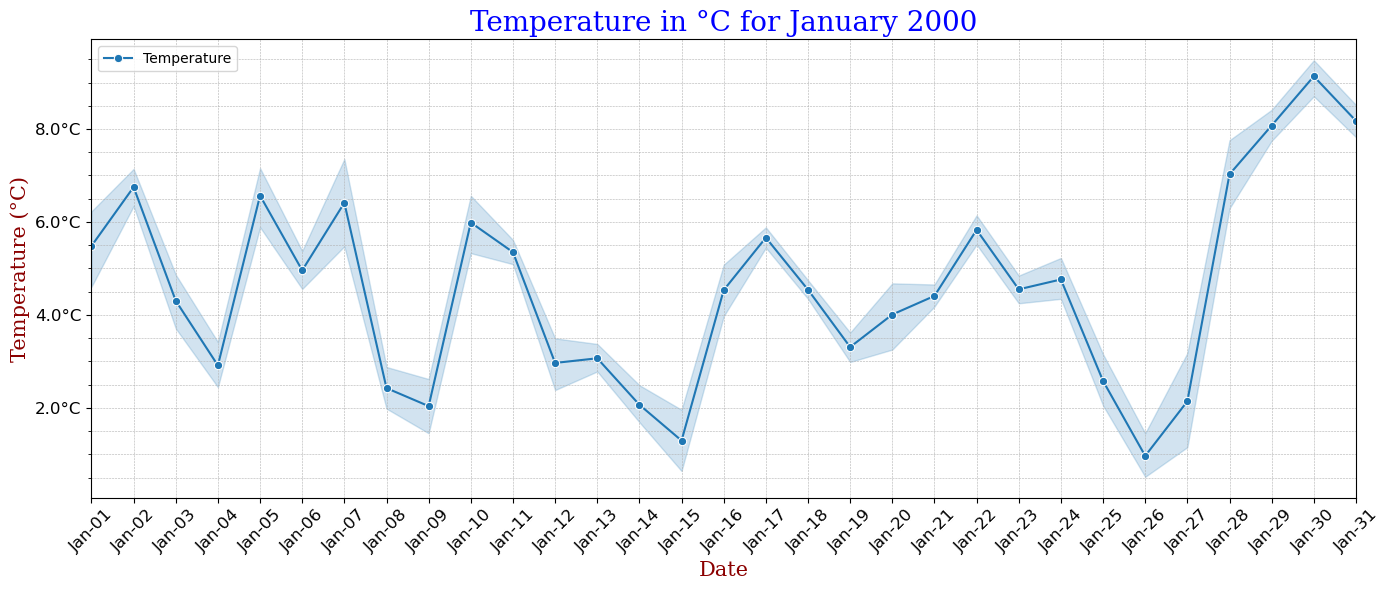

In [22]:
#Set up the plot size. Plot the temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the data using a seaborn lineplot
sns.lineplot(data=truncatedDF, x='Date_only', y='Temperature (°C)', marker='o')
#Set the title
plt.title('Temperature in °C for January 2000', fontdict=font1)
plt.xlabel('Date', fontdict=font2)
plt.ylabel('Temperature (°C)', fontdict=font2)
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Set the y-axis to display the temperature in degrees celsius
ax.yaxis.set_major_formatter(temperature_formatter)

# Set the major locator to every second day
ax.xaxis.set_major_locator(mdate.DayLocator(interval=1))  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%b-%d'))  

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())
#Only show january dates
plt.xlim([dt.date(2000, 1, 1), dt.date(2000, 1, 31)])

plt.legend(['Temperature'], loc='upper left')
# Adjust layout to fit labels
plt.tight_layout()
plt.show()

### The mean temperature each day

***

While seaborn has plotted the mean temperature each day for the month of January 2000 above, we could also take a different approach to this. We could choose to use the `resample().mean()` functions as below, which will resample the dataset based on the vaule added to the `resample()` function. The `D` value used below will resample the dataset by day, and the `mean()` will get the mean of the daily values. Therefore, as shown below, we could achieve a very similar plot to that given by the seaborn library above, by using these function on the truncated dataset for January 2000.This has being completed below

In [10]:
#Calculate the mean temperature for each day.
#We can use the resample method to calculate the mean temperature for each day
#The 'D' parameter is used to specify that we want to resample the data by day
meantemp_daily = df['Temperature (°C)'].resample('D').mean()

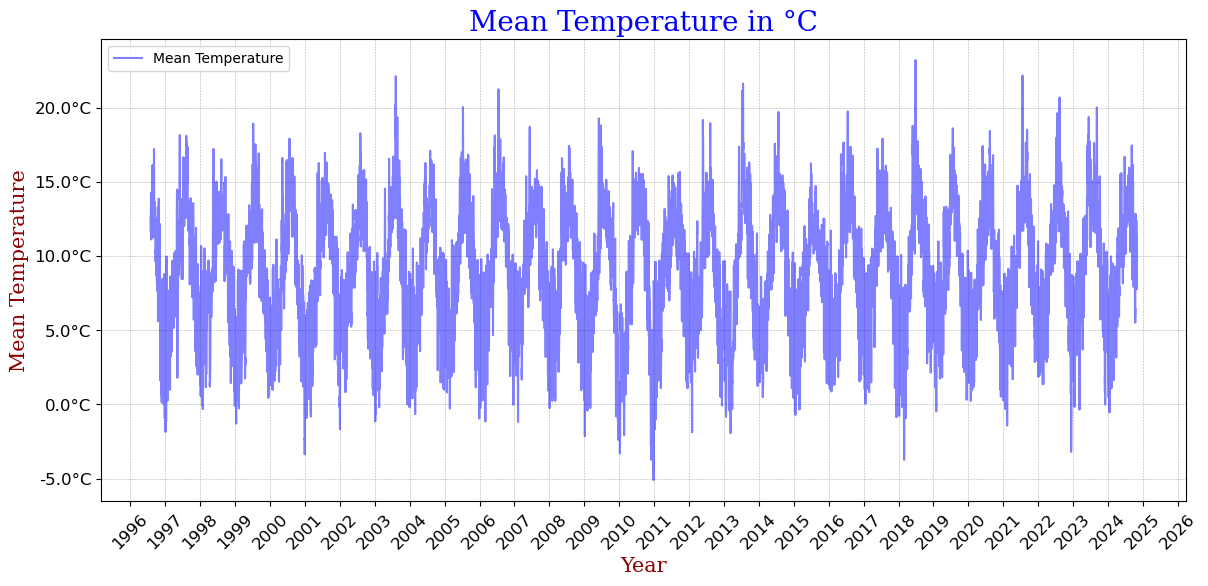

In [35]:
#Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the mean temperature
ax.plot(meantemp_daily, color='blue', alpha=0.5)
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
#Add a title
ax.set_title('Mean Temperature in °C', fontdict = font1)
#Add labels
ax.set_xlabel('Year', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2)
#Add a legend
plt.legend(['Mean Temperature'], loc='upper left')

#Set the major locator to every 2nd day, minor locator to every day.
ax.xaxis.set_major_locator(mdate.YearLocator())  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y'))  

#Set the y-axis to display the temperature in degrees celsius
ax.yaxis.set_major_formatter(temperature_formatter)

#Add ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

#Show the plot
plt.show()


And as promised, looking at the truncated dataset will give us a very similar plot to the seaborn plot earlier on. We can see the mean daily temperature for January 2000 below.

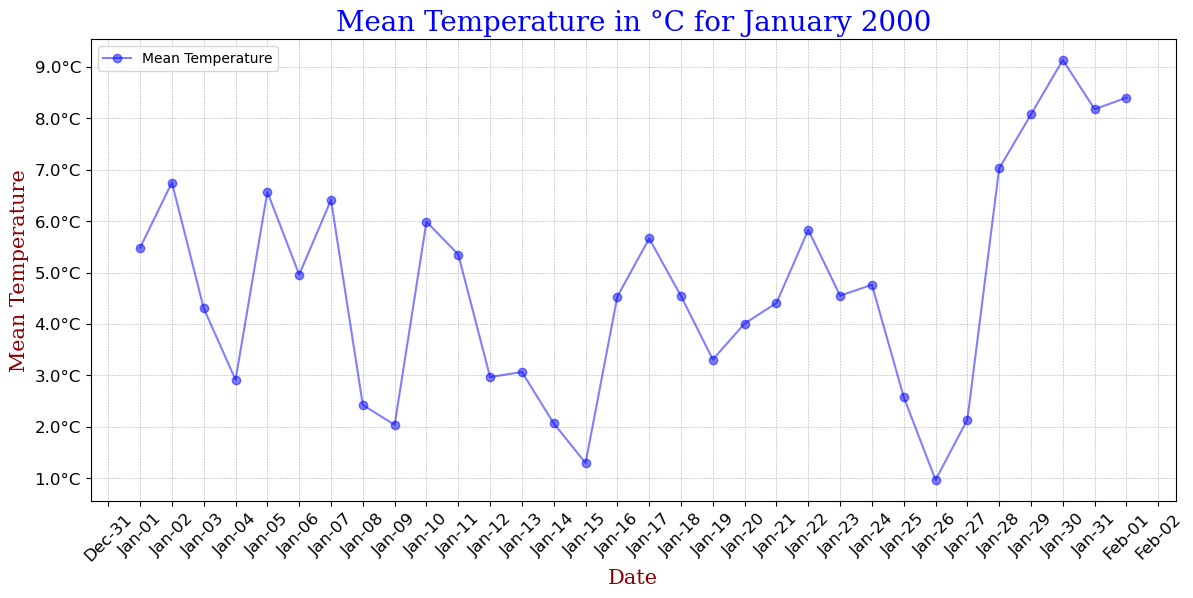

In [34]:
#Get the meantemp based on a daily resamplet of the dataset.
truncated_meantemp = truncatedDF['Temperature (°C)'].resample('D').mean()

##Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the mean temperature for January 2000
ax.plot(truncated_meantemp,  color='blue', alpha=0.5, marker='o')
#Add a title
ax.set_title('Mean Temperature in °C for January 2000', fontdict = font1)
#Add labels
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2)
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)

#Set the major locator to every 2nd day, minor locator to every day.
ax.xaxis.set_major_locator(mdate.DayLocator())  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%b-%d'))  


#Set the y-axis to display the temperature in degrees celsius
ax.yaxis.set_major_formatter(temperature_formatter)

#Add a legend
plt.legend(['Mean Temperature'], loc='upper left')

#Add and customise your ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

#Show the plot
plt.show()


### The mean temperature each month

***

Here again we can use the `resample()` function. This time we use the `ME` argument which will resample the data based on monthly data. We combing this with the `mean()` function as above to get the mean temperature for each month.

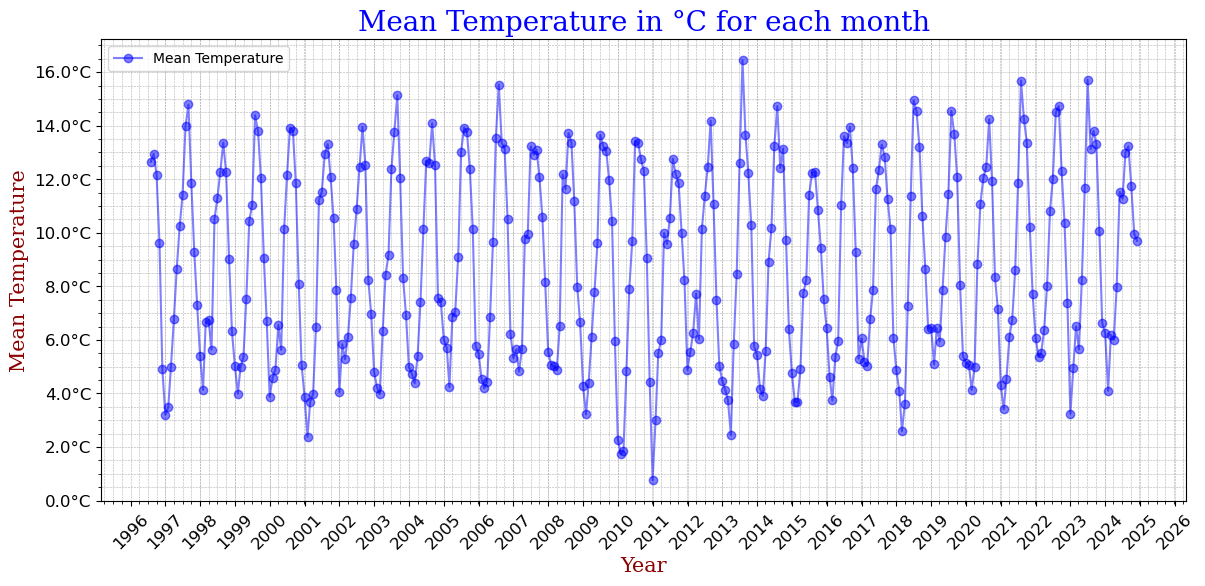

In [ ]:
#Calculate the mean temperature for each month.
#We can use the resample method to calculate the mean temperature for each month
#The 'ME' parameter is used to specify that we want to resample the data by month
meantemp_monthly = df['Temperature (°C)'].resample('ME').mean()


#Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the mean temperature data
ax.plot(meantemp_monthly, color='blue', marker='o', alpha=0.5)
#Add a title
ax.set_title('Mean Temperature in °C for each month', fontdict = font1)
#Add labels
ax.set_xlabel('Year', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2)
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)

#Set the y-axis to display the temperature in degrees celsius
ax.yaxis.set_major_formatter(temperature_formatter)

#Set the major locator to every 2nd day, minor locator to every day.
ax.xaxis.set_major_locator(mdate.YearLocator())  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y'))  

#Add a legend
plt.legend(['Mean Temperature'], loc='upper left')

#Set the x-axis to show every 12 months. Changed to mdate.YearLocator() to show every year
#ax.set_xticks(ax.get_xticks()[::12])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

#Add minor ticks on y-axis
ax.yaxis.set_minor_locator(AutoMinorLocator())

#Add ticks
ax.minorticks_on()

plt.show()

Again we could truncate the data to give a nicer plot based over a lesser time period. For example we could look at the year 2004. We will do this below.

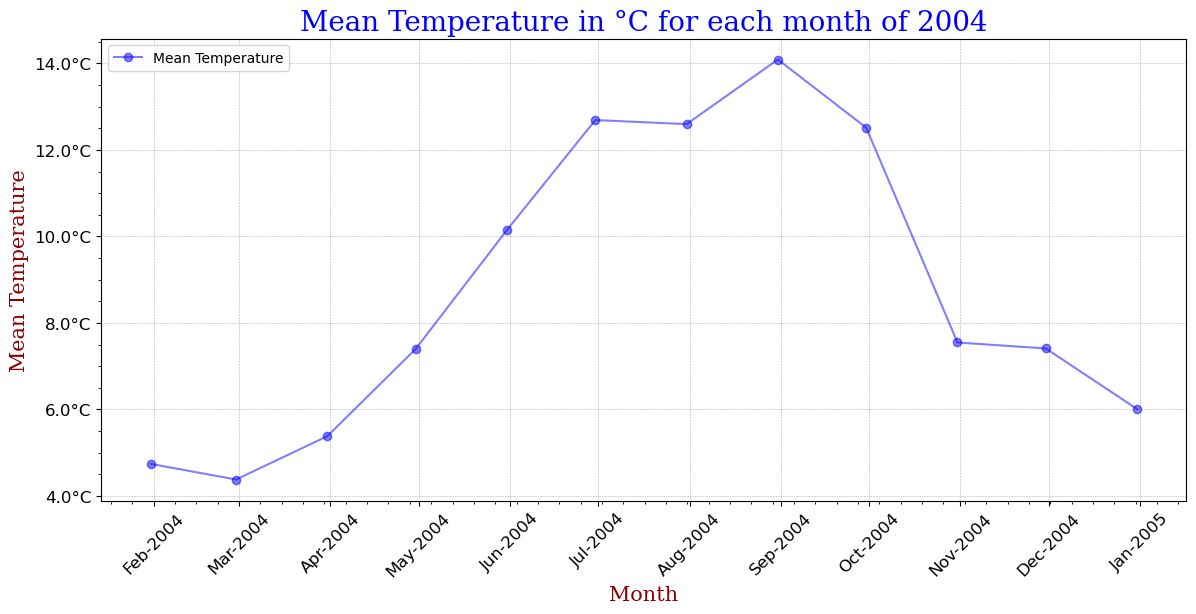

In [32]:

#Set the start and finish date for the year 2004
#Date filter to get data for the year 2021
dateFrom = '2004-01-01'
dateTo = '2004-12-31'

#Filter the data based on these dates
weather2004 = meantemp_monthly.loc[dateFrom:dateTo]


#Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
         
#Plot the mean temperature data
ax.plot(weather2004, color='blue', alpha=0.5, marker='o')

#Add a title
ax.set_title('Mean Temperature in °C for each month of 2004', fontdict = font1)
#Add labels
ax.set_xlabel('Month', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2)
#Add a grid
ax.grid(True, which='major', linestyle='--', linewidth=0.4)

#Set up the x-axis so the major locators are every 2nd day and minor locators every day.
ax.xaxis.set_major_locator(mdate.MonthLocator())  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%b-%Y'))  


#Set the y-axis to display the temperature in degrees celsius
ax.yaxis.set_major_formatter(temperature_formatter)
ax.minorticks_on()

#Add a legend-
plt.legend(['Mean Temperature'], loc='upper left')

#Add and customise your ticks
plt.xticks(rotation=45.,fontsize=12)
plt.yticks(fontsize=12)

#Show the plot
plt.show()

### Plot the Windspeed

***

We seen above that the windspeed column contined 50 rows with missing data. So, how do we deal with this missing data. We could use the `df.dropna()` function to remove all the rows where the windspeed value is NAN. However, we could alsso use the `interpolate()` to deal with the missing values in the dataset. The `interpolate()` function uses linear interpolation to fill in the missing values. I have chosen to use this method and have also decided to convert the windspeed to km/h vaules from knots. To do this we multiply the value in knots by 1.852 to get the value in km/h. We create a new column in the dataset called `Mean Wind Speed (km/h)` to store the results of the above analysis.

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, -20.0, '-20.0 (Km/h)'),
  Text(0, 0.0, '0.0 (Km/h)'),
  Text(0, 20.0, '20.0 (Km/h)'),
  Text(0, 40.0, '40.0 (Km/h)'),
  Text(0, 60.0, '60.0 (Km/h)'),
  Text(0, 80.0, '80.0 (Km/h)'),
  Text(0, 100.0, '100.0 (Km/h)')])

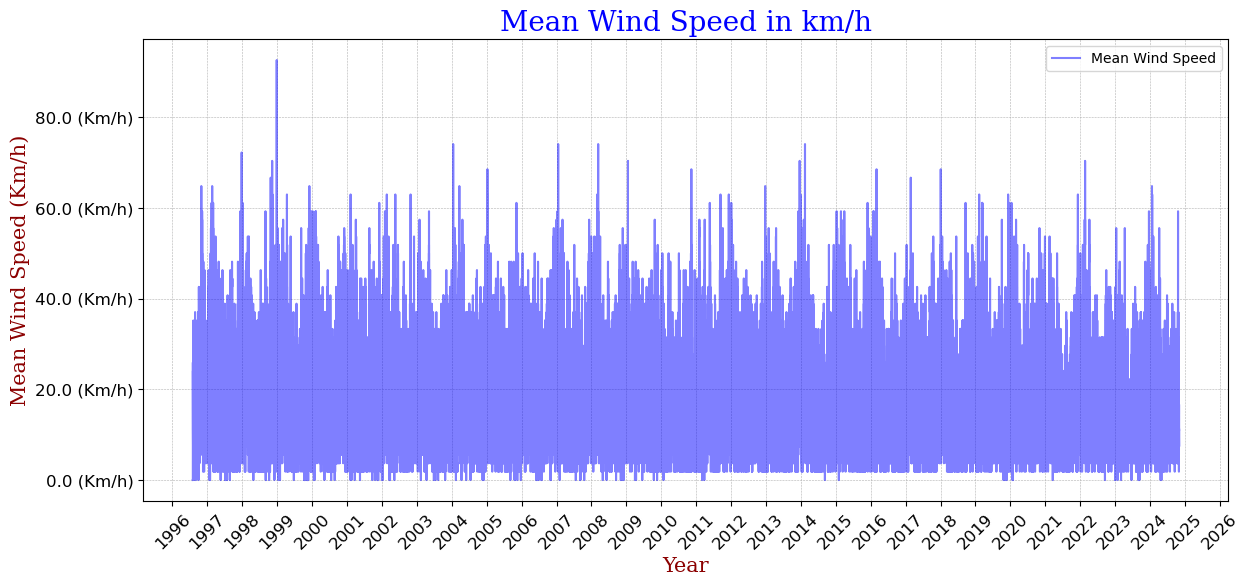

In [38]:
#The windspeed data is in knots. We can convert this to km/h by multiplying by 1.852
#Firstly though, we need to deal with the missing values in the dataset
#We can use the interpolate method to fill in the missing values
#The interpolate method uses linear interpolation to fill in the missing values
#We can then convert the windspeed data to km/h by multiplying by 1.852

df['Mean Wind Speed (knot)'] = df['Mean Wind Speed (knot)'].interpolate()

#Convert the windspeed data to km/h
df['Mean Wind Speed (km/h)'] = df['Mean Wind Speed (knot)'] * 1.852

windspeed = df['Mean Wind Speed (km/h)'].to_list()

# Create a function to format the windspeed values on the y-axis
def windspeed_formatter(windspeed, pos):
    s = f"{windspeed} (Km/h)"
    return s

#Plot the windspeed data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the mean wind speed in km/h
ax.plot(df['Mean Wind Speed (km/h)'], color='blue', alpha=0.5)
#Set the title
ax.set_title('Mean Wind Speed in km/h', fontdict = font1)
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)

#Set the major locator to every 2nd day, minor locator to every day.
ax.xaxis.set_major_locator(mdate.YearLocator())  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y'))  

#Set the y-axis to display the windspeed in km/h
ax.yaxis.set_major_formatter(windspeed_formatter)

#Add a legend
plt.legend(['Mean Wind Speed'], loc='upper right')

#Add lables 
ax.set_xlabel('Year', fontdict = font2)
ax.set_ylabel('Mean Wind Speed (Km/h)', fontdict = font2)
#Add ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)



### Mean Windspeed for June 2015

A similar issue can be seen above. In order to get a satisfactory plot it is necessary to truncate the data based on time. We will have a look at this below.

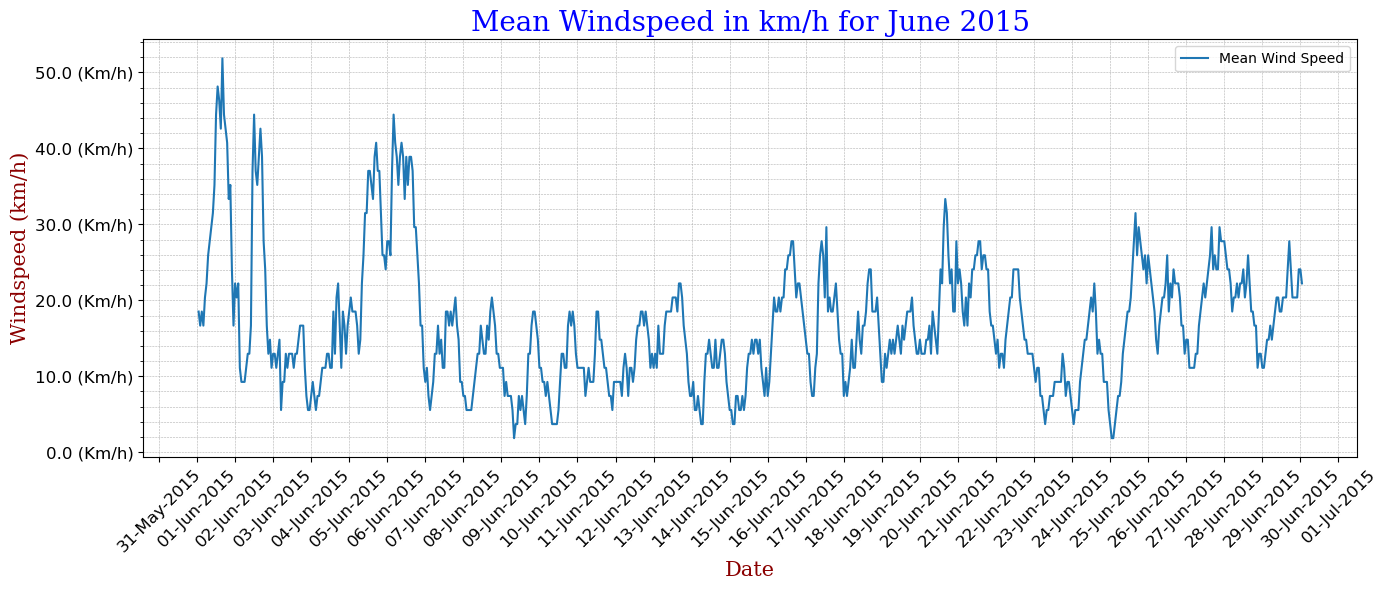

In [39]:

# Filter data for a specific period of time
startDate = "2015-06-01 01:00:00"
endDate = "2015-06-30 01:00:00"
filteredDf = df.loc[startDate:endDate]

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Plot with Seaborn
fig, ax = plt.subplots(figsize=(14, 6))

#Plot a seaborn lineplot of the data
sns.lineplot(data=filteredDf, x=filteredDf.index, y="Mean Wind Speed (km/h)")
#Add a title
plt.title('Mean Windspeed in km/h for June 2015', fontdict=font1)
#Add labels
plt.xlabel('Date', fontdict=font2)
plt.ylabel('Windspeed (km/h)', fontdict=font2)
#Add a legend
plt.legend(['Mean Wind Speed'], loc='upper right')

#Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.4)

#Set your major and minor locators for x-axis
ax.xaxis.set_major_locator(mdate.DayLocator(interval=1))  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%d-%b-%Y'))  
ax.xaxis.set_minor_locator(mdate.DayLocator())

#Set the y-axis to display the windspeed in km/h
ax.yaxis.set_major_formatter(windspeed_formatter)

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

#Add ticks to plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Adjust layout to fit labels
plt.tight_layout()

#Show the plot
plt.show()

### Mean Windspeed for 1st June 2015
***

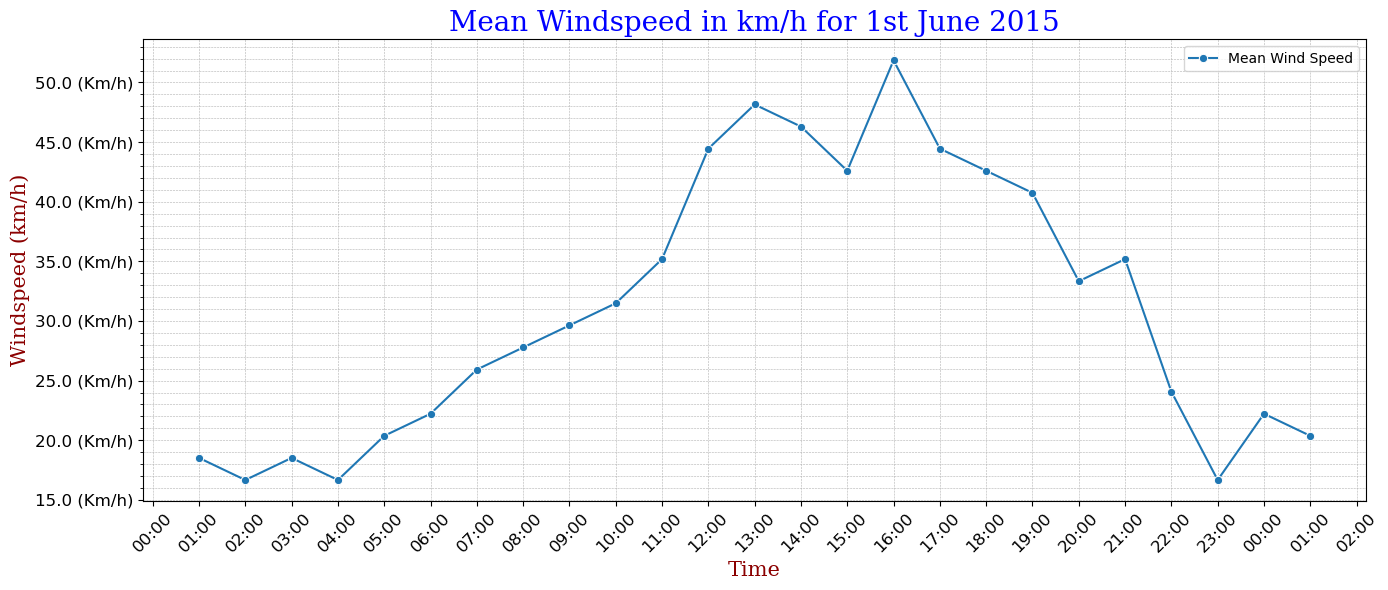

In [17]:
#How about the mean windspeed for a 24hour period

# Filter data for a specific period of time


startDate = "2015-06-01 01:00:00"
endDate = "2015-06-02 01:00:00"

twentyfourhourDf = df.loc[startDate:endDate]

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Plot with Seaborn
fig, ax = plt.subplots(figsize=(14, 6))

#Plot a seaborn lineplot of the data
sns.lineplot(data=twentyfourhourDf, x=twentyfourhourDf.index, y="Mean Wind Speed (km/h)", marker='o')
#Add a title
plt.title('Mean Windspeed in km/h for 1st June 2015', fontdict=font1)
#Add labels
plt.xlabel('Time', fontdict=font2)
plt.ylabel('Windspeed (km/h)', fontdict=font2)
#Add a legend
plt.legend(['Mean Wind Speed'], loc='upper right')

#Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.4)

#Set your major and minor locators for x-axis

ax.xaxis.set_major_locator(mdate.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdate.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdate.HourLocator())

#Add ticks to plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

#Set the y-axis to display the windspeed in km/h
ax.yaxis.set_major_formatter(windspeed_formatter)


# Add minor ticks on y-axis
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()

plt.show()



### Rolling Windspeed
***

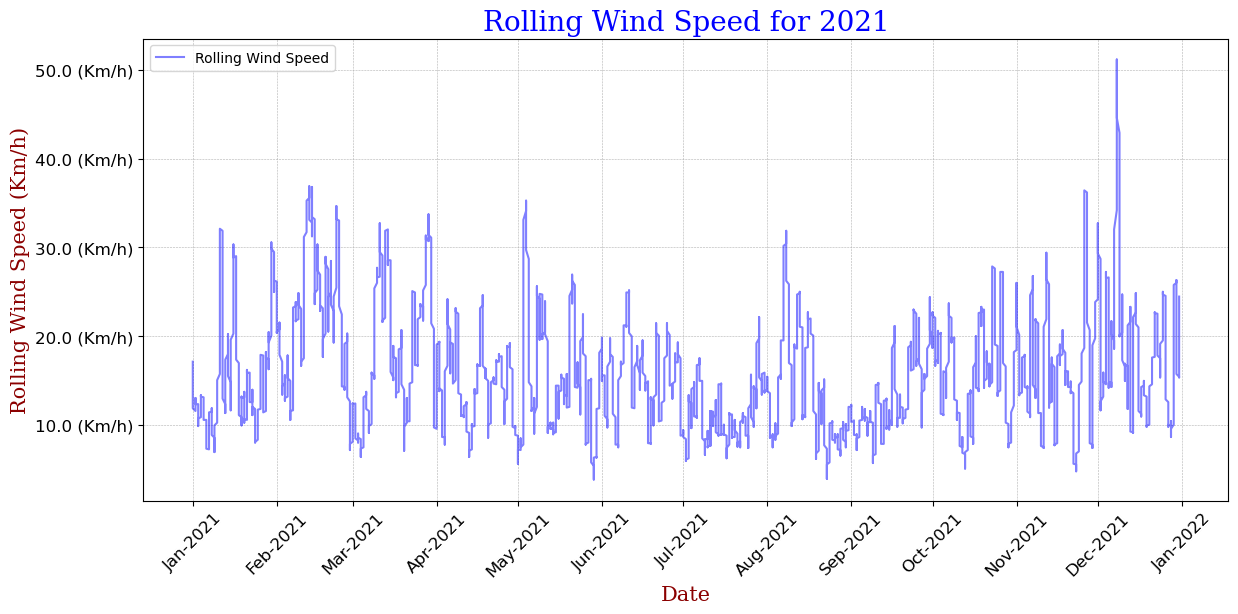

In [40]:
#The rolling windspeed over a 24 hour period for the year 2021
#We can calculate the rolling windspeed over a 24 hour period using the rolling method
#The rolling method calculates the rolling average over a specified window size
#We can specify the window size by using the window parameter

#Date filter to get data for the year 2021
date_from = '2021-01-01'
date_to = '2021-12-31'

#Calculate the rolling windspeed over a 24 hour period
df['Rolling Wind Speed (km/h)'] = df['Mean Wind Speed (km/h)'].rolling('24h').mean()

#Plot the rolling windspeed data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Use date filter to filter the data for the year 2021
ax.plot(df.loc[date_from:date_to]['Date_only'], df.loc[date_from:date_to]['Rolling Wind Speed (km/h)'], color='blue', alpha=0.5)

ax.xaxis.set_major_locator(mdate.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdate.DateFormatter('%b-%Y'))

#Add a title
ax.set_title('Rolling Wind Speed for 2021', fontdict = font1)

#Set the y-axis to display the windspeed in km/h
ax.yaxis.set_major_formatter(windspeed_formatter)

#Add x and y labels
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Rolling Wind Speed (Km/h)', fontdict = font2)
#Add a legend
plt.legend(['Rolling Wind Speed'], loc='upper left')
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
#Add ticks
plt.xticks(fontsize=12, rotation=45)

plt.yticks(fontsize=12)

plt.show()


### Rolling Windspeed for 1st June 2015

***

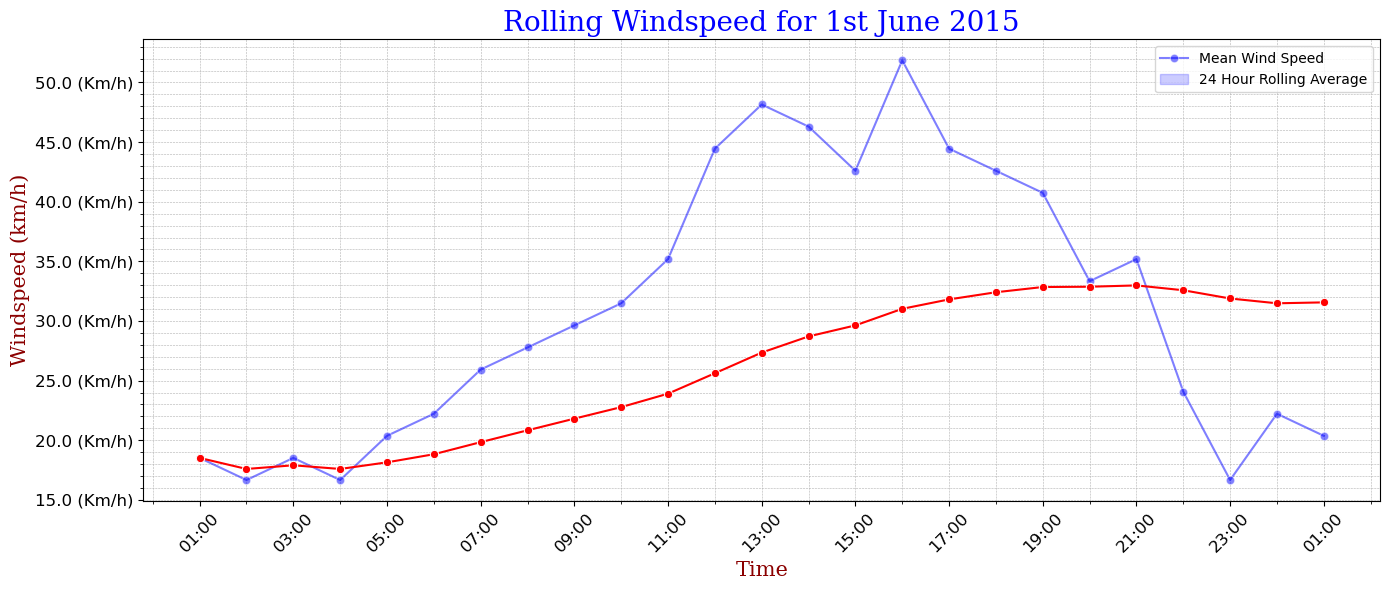

In [19]:
#how about the rolling windspeed on the one day graph

# Filter data for a specific period of time
startDate = "2015-06-01 01:00:00"
endDate = "2015-06-02 01:00:00"

onedayDf = df.loc[startDate:endDate]

#Calculate the rolling average of the windspeed data
rolling_average = onedayDf['Mean Wind Speed (km/h)'].rolling(window='24h').mean()

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Plot with Seaborn
fig, ax = plt.subplots(figsize=(14, 6))

#Plot a seaborn lineplot of the data
sns.lineplot(data=onedayDf, x=onedayDf.index, y="Mean Wind Speed (km/h)", color='blue', alpha=0.5, marker='o')
sns.lineplot(data=rolling_average, color='red', label='24 Hour Rolling Average', marker='o')

#Set the y-axis to display the windspeed in km/h
ax.yaxis.set_major_formatter(windspeed_formatter)

#Add a title
plt.title('Rolling Windspeed for 1st June 2015', fontdict=font1)
#Add labels
plt.xlabel('Time', fontdict=font2)
plt.ylabel('Windspeed (km/h)', fontdict=font2)
#Add a legend

plt.legend(['Mean Wind Speed', '24 Hour Rolling Average'], loc='upper right')

#Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.4)

#Set your major and minor locators for x-axis

ax.xaxis.set_major_locator(mdate.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdate.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdate.HourLocator())

#Add ticks to plot
plt.xticks(fontsize=12, rotation=45)

plt.yticks(fontsize=12)

# Add minor ticks on y-axis
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()

plt.show()




### Max Windspeed

***

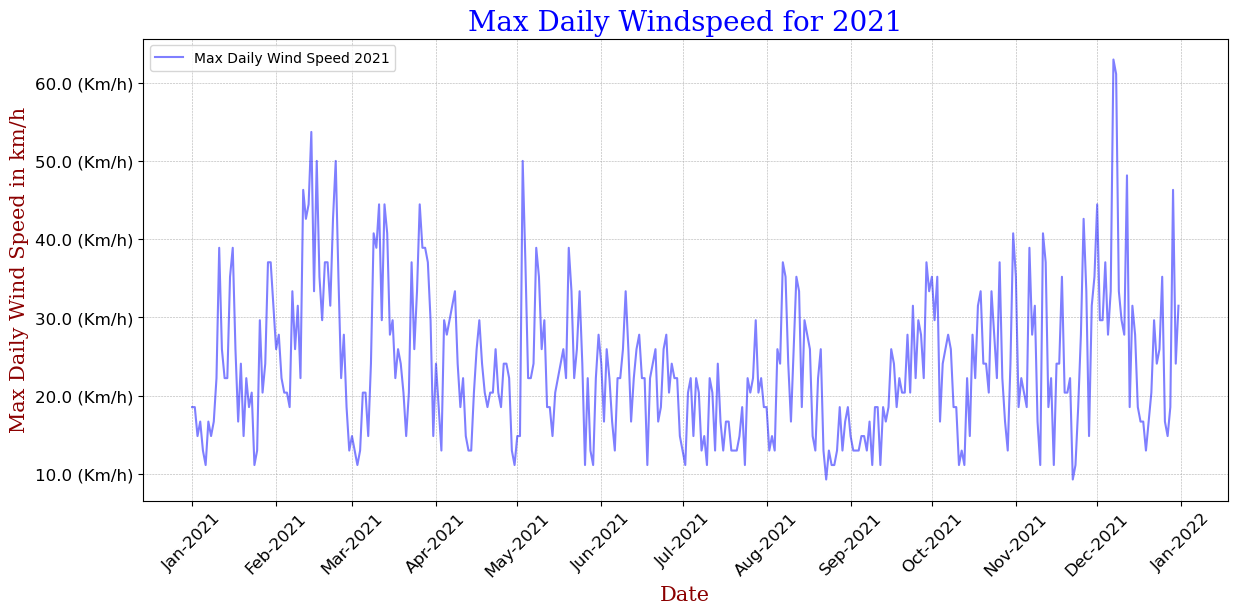

In [42]:

#Date filter to get data for the year 2021
date_from = '2021-01-01'
date_to = '2021-12-31'

# Calculate the daily max windspeed
DailyMax = df.loc[date_from:date_to]['Mean Wind Speed (km/h)'].resample('D').max()

#Plot the max windspeed data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Use date filter to filter the data for the year 2021
ax.plot(DailyMax, color='blue', alpha=0.5)

#Set the y-axis to display the windspeed in km/h
ax.xaxis.set_major_locator(mdate.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdate.DateFormatter('%b-%Y'))
#Set the y-axis to display the windspeed in km/h
ax.yaxis.set_major_formatter(windspeed_formatter)

#Add title
ax.set_title('Max Daily Windspeed for 2021', fontdict = font1)
#Add lables
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Max Daily Wind Speed in km/h', fontdict = font2)
#Add a legend
plt.legend(['Max Daily Wind Speed 2021'], loc='upper left')
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
#Add ticks to plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()

### Monthly Mean of the Max Daily Windspeed.

***

Lets look at this for 2021 again as above.

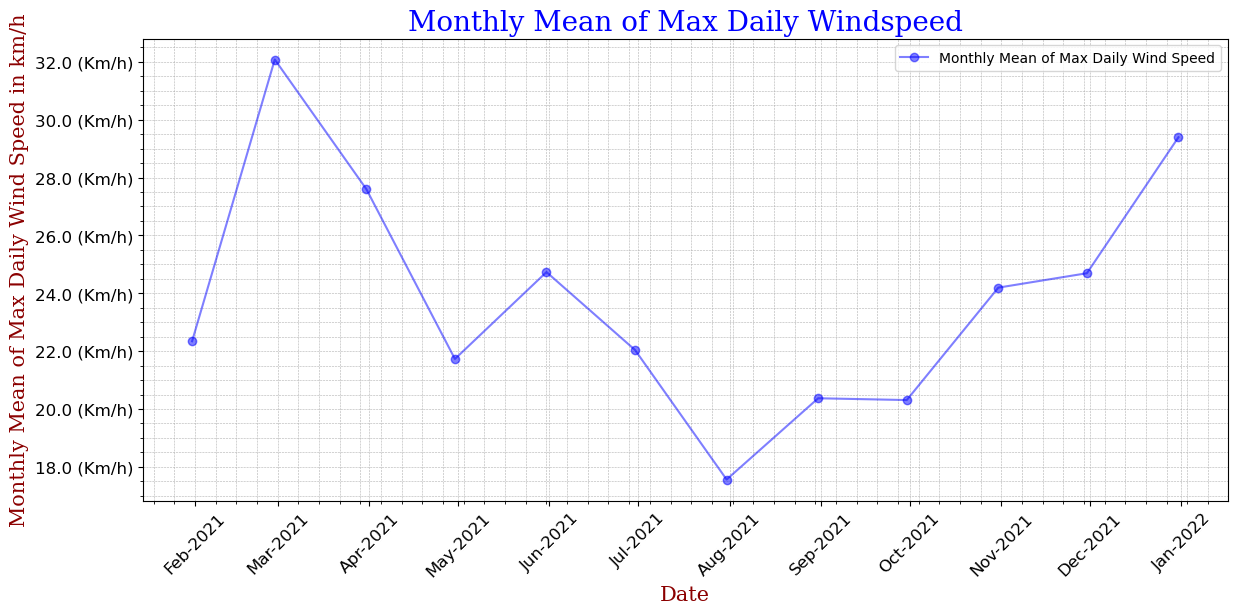

In [43]:
#Monthly mean of the max daily windspeed


#Calculate the monthly mean of the max daily windspeed
MonthlyMax = DailyMax.resample('ME').mean()

#print(MonthlyMax)

#Plot the monthly mean of the max daily windspeed
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the monthly mean of the max daily windspeed
ax.plot(MonthlyMax, color='blue', alpha=0.5, marker='o')

#Set the y-axis to display the windspeed in km/h
ax.xaxis.set_major_locator(mdate.MonthLocator())
ax.xaxis.set_major_formatter(mdate.DateFormatter('%b-%Y'))

#Set the y-axis to display the windspeed in km/h
ax.yaxis.set_major_formatter(windspeed_formatter)

#Add a title
ax.set_title('Monthly Mean of Max Daily Windspeed', fontdict = font1)
#Add labels
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Monthly Mean of Max Daily Wind Speed in km/h', fontdict = font2)

#Add a legend
plt.legend(['Monthly Mean of Max Daily Wind Speed'], loc='upper right')

#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)

#Add ticks to plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

ax.minorticks_on()

plt.show()


### **References**

***
Reference 1: [Javapoint -skip rows while reading csv file](https://www.javatpoint.com/how-to-skip-rows-while-reading-csv-file-using-pandas)

Reference 2: [W3Schools - Python datetime](https://www.w3schools.com/python/python_datetime.asp)

Reference 3: [Real Python - Slicing and dicing with .loc[]](https://realpython.com/lessons/slicing-and-dicing-with-loc/)

Reference 4: [Pandas - Dataframe resampling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

Reference 5: [Geeks for Geeks- Dataframe Resampling](https://www.geeksforgeeks.org/python-pandas-dataframe-resample/)

Reference 6: [Tutorialspoint - Resampling timeseries](https://www.tutorialspoint.com/how-to-resample-time-series-data-in-python)

Reference 7: [Pandas- Skipinitialspace funtion](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

Reference 8: [Geeks for Geeks - Strip whitespace from dataframe](https://www.geeksforgeeks.org/pandas-strip-whitespace-from-entire-dataframe/)


### End